<a href="https://colab.research.google.com/github/andresaraque28/Ganaderia_De_Precision/blob/main/Araque_yolov8_Ganaderia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ganaderia de precision

En este Colab, se lleva a cabo el entrenamiento y las pruebas con el objetivo de realizar la identificación y el conteo de vacas. Este proceso se realiza utilizando el algoritmo YOLOv8, que es conocido por su eficacia en la detección de objetos. La aplicación de YOLOv8 permite lograr una identificación precisa de las vacas en imágenes y realizar un conteo confiable de las mismas.



##Base de datos

In [1]:
# Descargar el archivo zip
!wget https://storage.googleapis.com/theos-development-static-v1/cowsV82.zip

--2024-02-02 15:32:25--  https://storage.googleapis.com/theos-development-static-v1/cowsV82.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.126.207, 74.125.132.207, 74.125.201.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.126.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7685710227 (7.2G) [application/zip]
Saving to: ‘cowsV82.zip’

cowsV82.zip         100%[===================>]   7.16G   100MB/s    in 88s     

2024-02-02 15:33:53 (83.6 MB/s) - ‘cowsV82.zip’ saved [7685710227/7685710227]



In [2]:
# Descomprimir el archivo zip
!unzip cowsV82.zip -d cowsV82

Archive:  cowsV82.zip
   creating: cowsV82/cows2v8/
  inflating: cowsV82/cows2v8/configuration.yaml  
   creating: cowsV82/cows2v8/train/
   creating: cowsV82/cows2v8/train/images/
  inflating: cowsV82/cows2v8/train/images/15ea8b35-bdb4-49c0-bea8-380fd3113804.JPG  
  inflating: cowsV82/cows2v8/train/images/e473e165-ebd7-4b7e-8653-2cc120bdd072.JPG  
  inflating: cowsV82/cows2v8/train/images/048af31c-be85-4060-9b0f-d1a0ec467577.JPG  
  inflating: cowsV82/cows2v8/train/images/04cc41d1-de5c-4ee9-a07f-89c73aa8a0ed.JPG  
  inflating: cowsV82/cows2v8/train/images/b642c05c-a42f-4116-be6f-099dcdbb2fa6.JPG  
  inflating: cowsV82/cows2v8/train/images/63df0582-6333-4411-b0e4-a8c399b6c097.JPG  
  inflating: cowsV82/cows2v8/train/images/b352d759-76d1-4f81-9137-c830f6be61f2.JPG  
  inflating: cowsV82/cows2v8/train/images/92761b7e-9466-4e22-9857-fe75e125e942.JPG  
  inflating: cowsV82/cows2v8/train/images/45867f18-7208-4dd4-9a42-876a36517cd8.JPG  
  inflating: cowsV82/cows2v8/train/images/fbdc3f95-cfa

##Instalacion ultralytics

In [3]:
!python3.10 -m pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 709.3/709.3 kB 4.1 MB/s eta 0:00:00


##Entrenamiento modelo

In [4]:
#se importa yolo
from ultralytics import YOLO

!yolo mode=checks



Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 509, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {MODES}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=<module 'ultralytics.utils.checks' from '/usr/local/lib/python3.10/dist-packages/ultralytics/utils/checks.py'>'. Valid modes are ('train', 'val', 'predict', 'export', 'track', 'benchmark').

    Arguments received: ['yolo', 'mode=checks']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of ('detect', 'segment', 'classify', 'pose', 'obb')
                MODE (required) is one of ('train', 'val', 'predict', 'export', 'track', 'benchmark')
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at ht

In [7]:
#se entrena el modelo a partir de los mejores pesos obtenidos en entrenamientos anteriores por ello se definieron pocas epocas
!yolo task=detect mode=train model=/content/best.pt data='/content/cowsV82/cows2v8/configuration.yaml' epochs=1 imgsz=640

Ultralytics YOLOv8.1.9 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/best.pt, data=/content/cowsV82/cows2v8/configuration.yaml, epochs=1, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, s

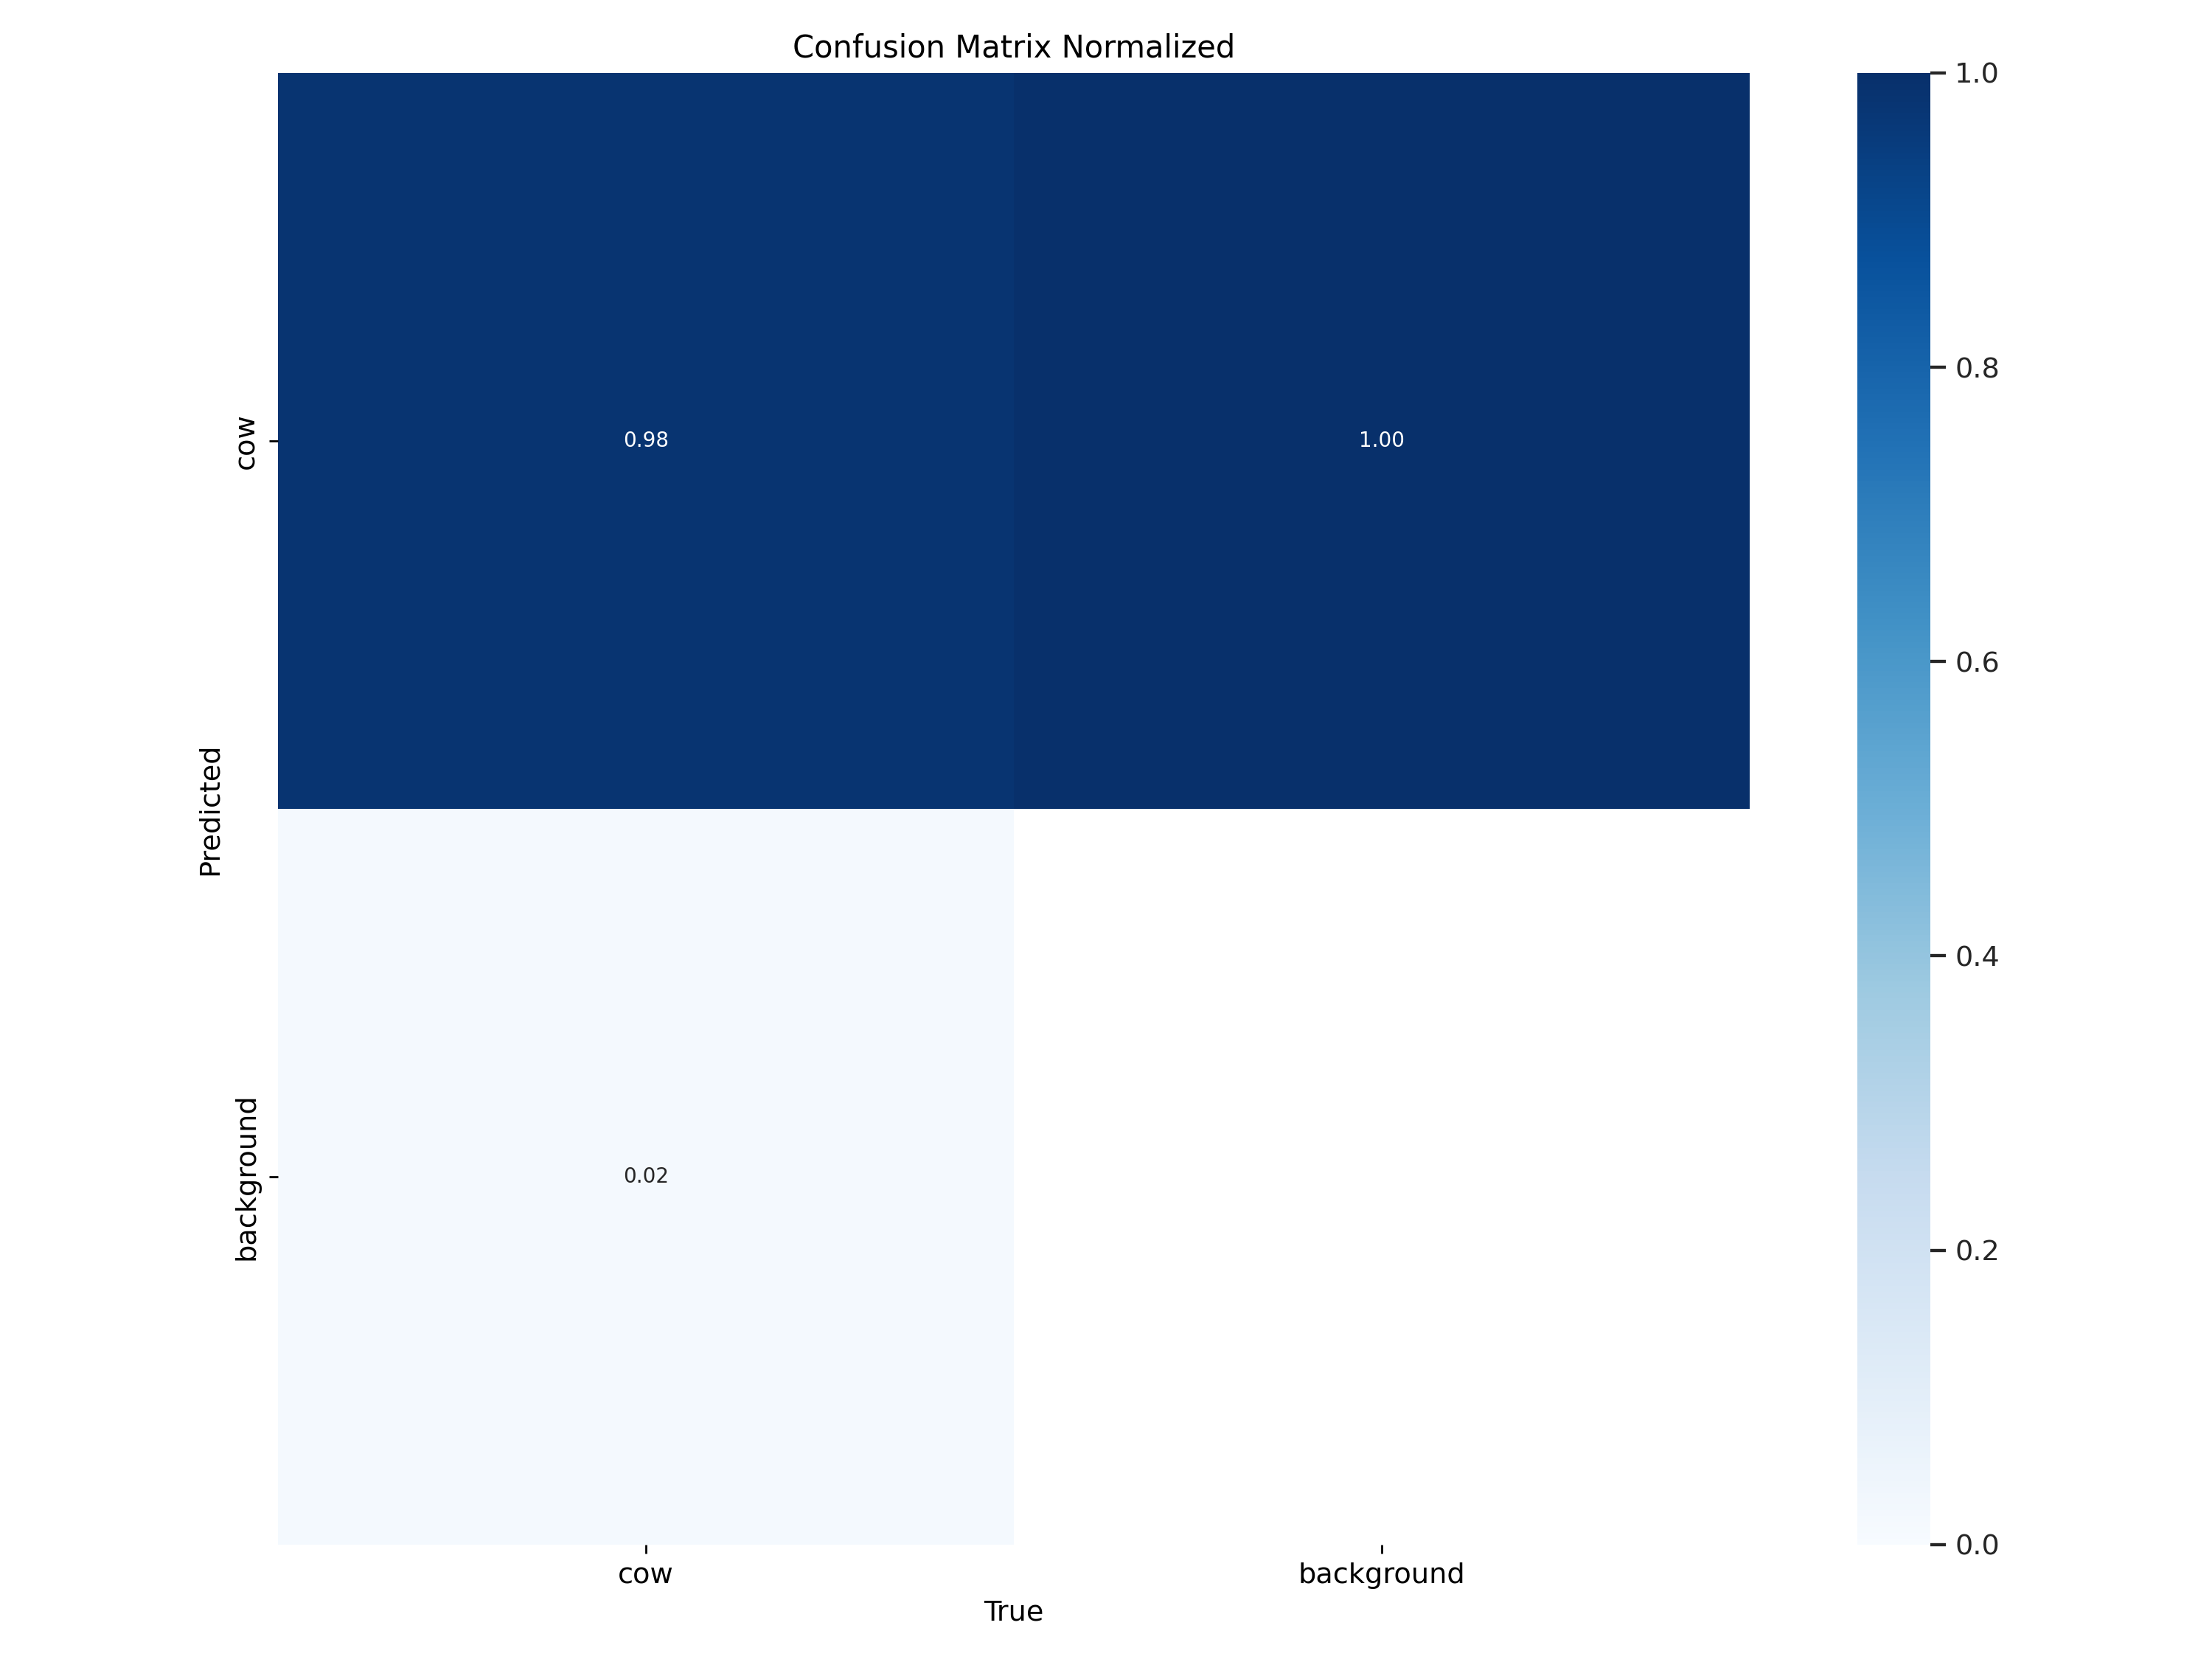

In [8]:

from IPython.display import Image, display, HTML
titulo = 'Matriz de confusion normalizada'

# Mostrar la imagen y el título
display(HTML(f'<h2>{titulo}</h2>'))
Image(filename= f'/content/runs/detect/train/confusion_matrix_normalized.png', width= 600 )

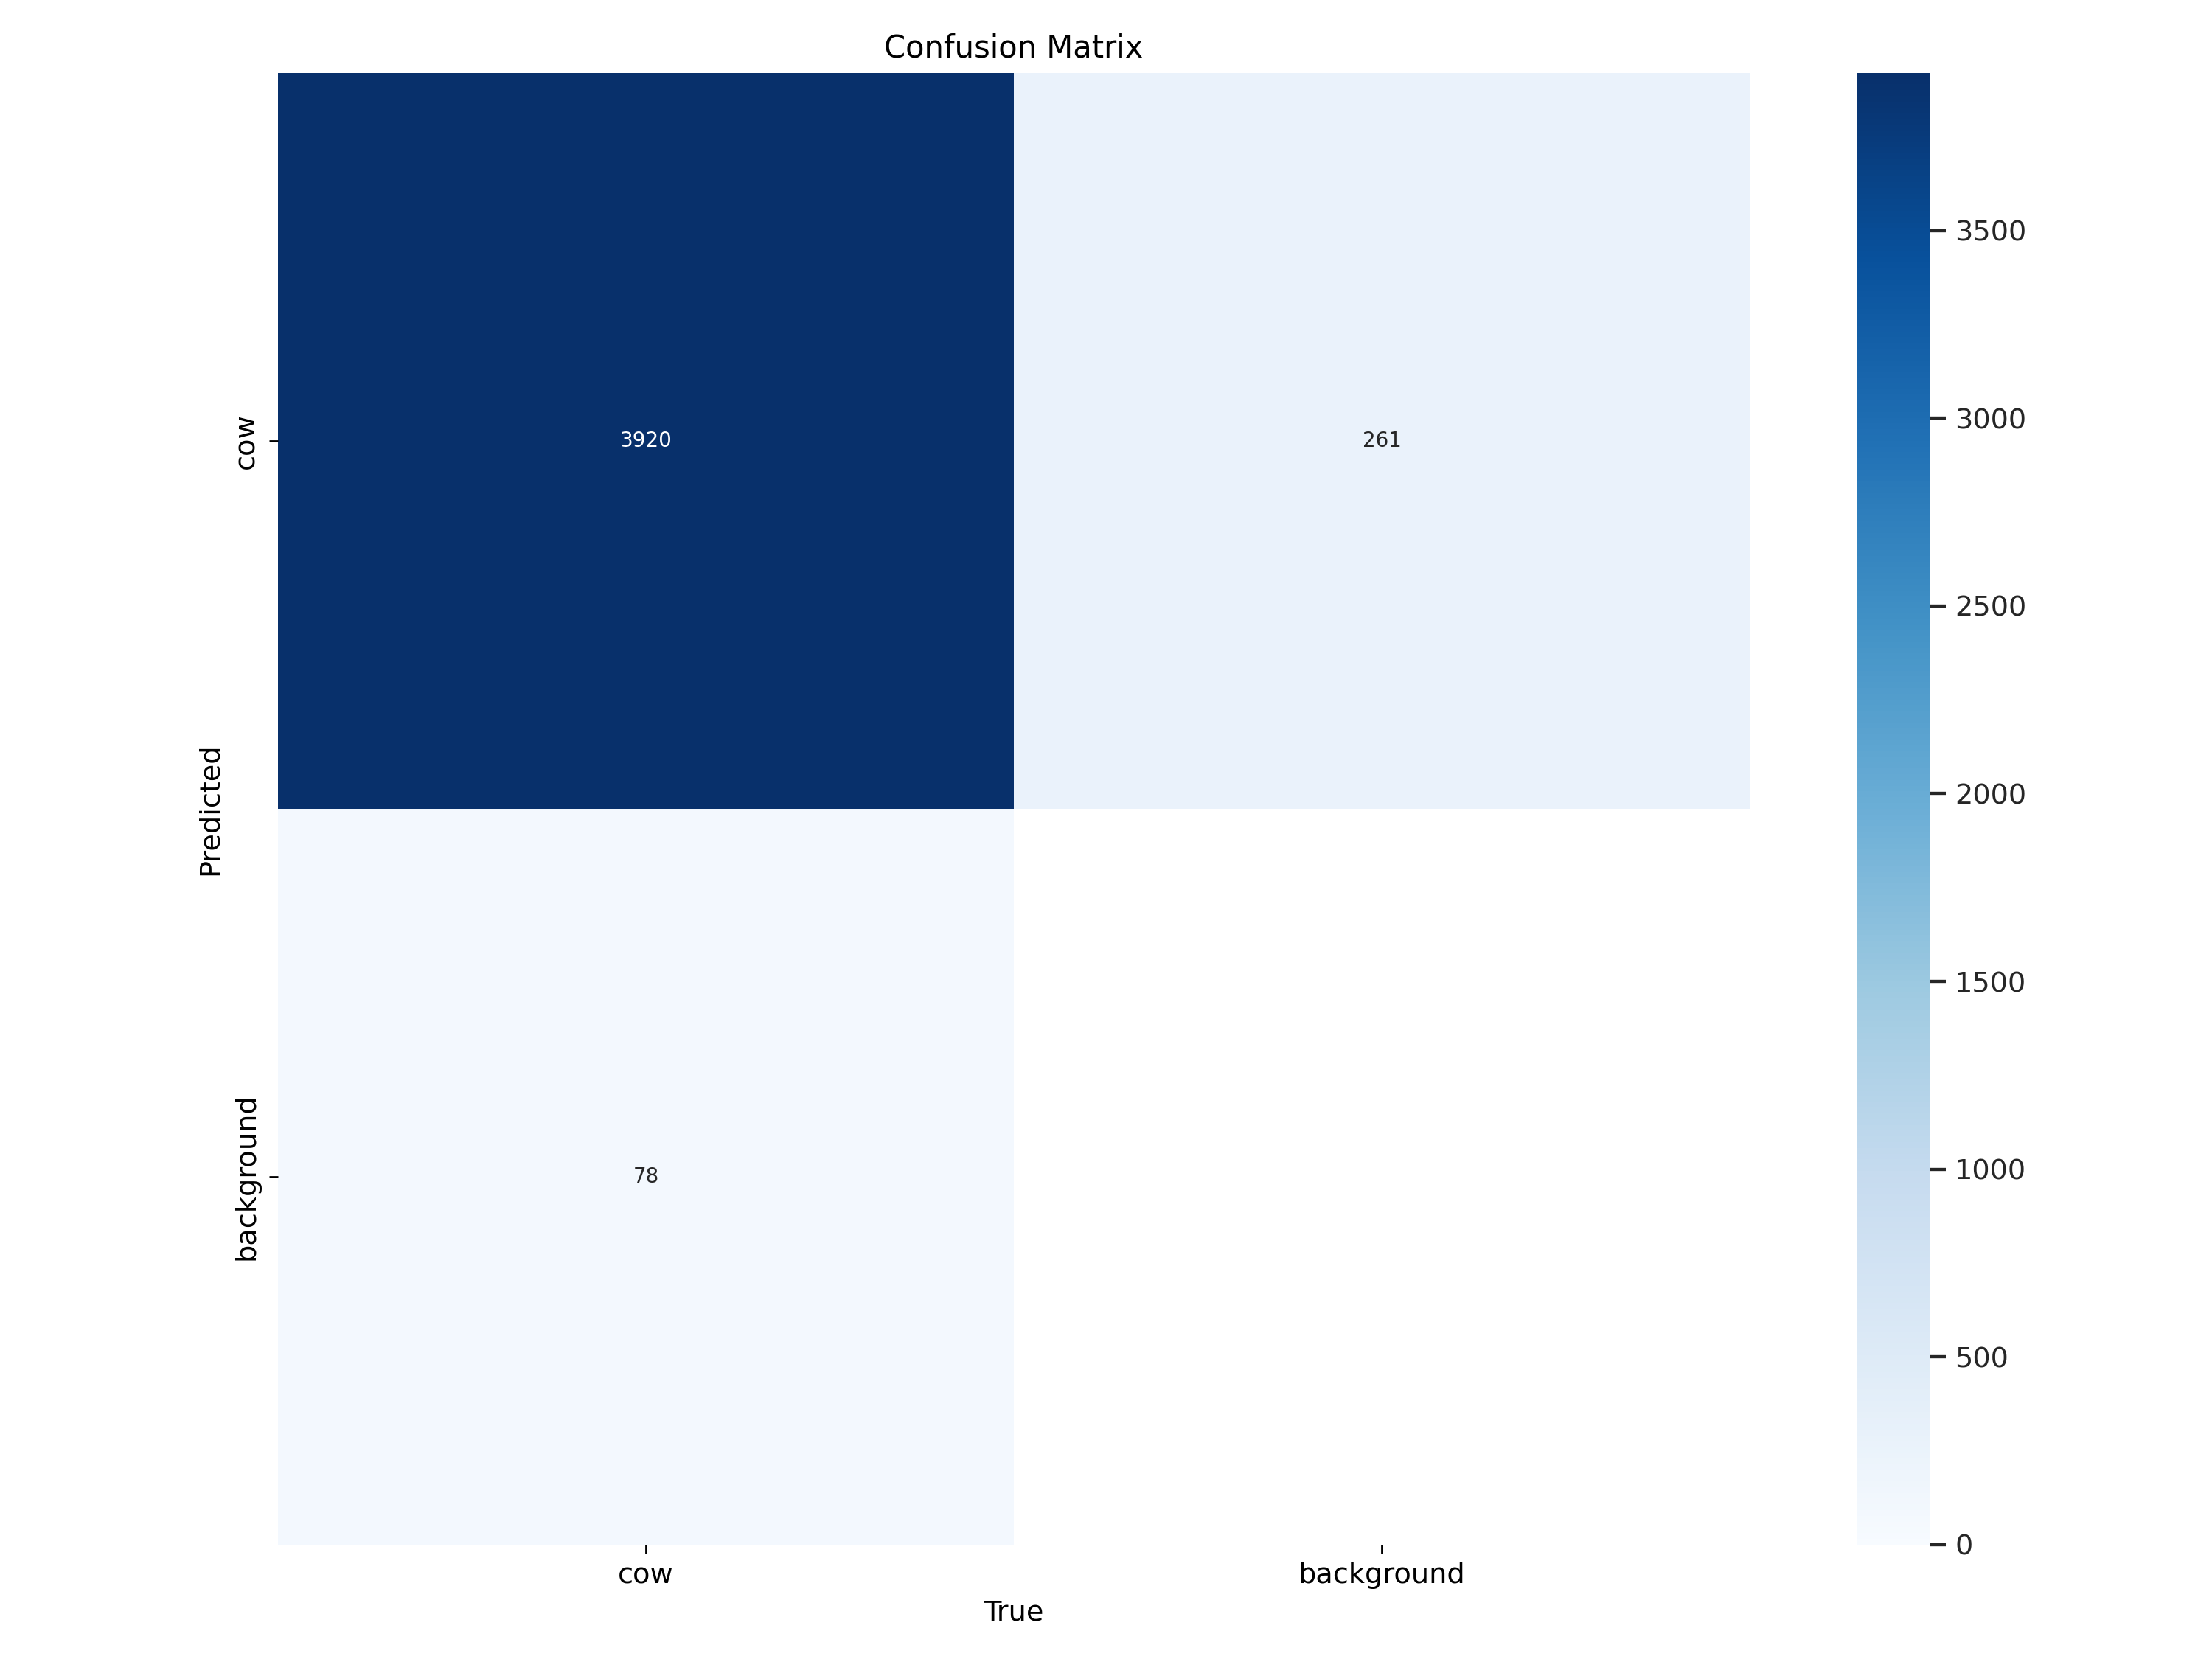

In [9]:

titulo = 'Matriz de confusion'

# Mostrar la imagen y el título
display(HTML(f'<h2>{titulo}</h2>'))
Image(filename= f'/content/runs/detect/train/confusion_matrix.png', width= 600 )

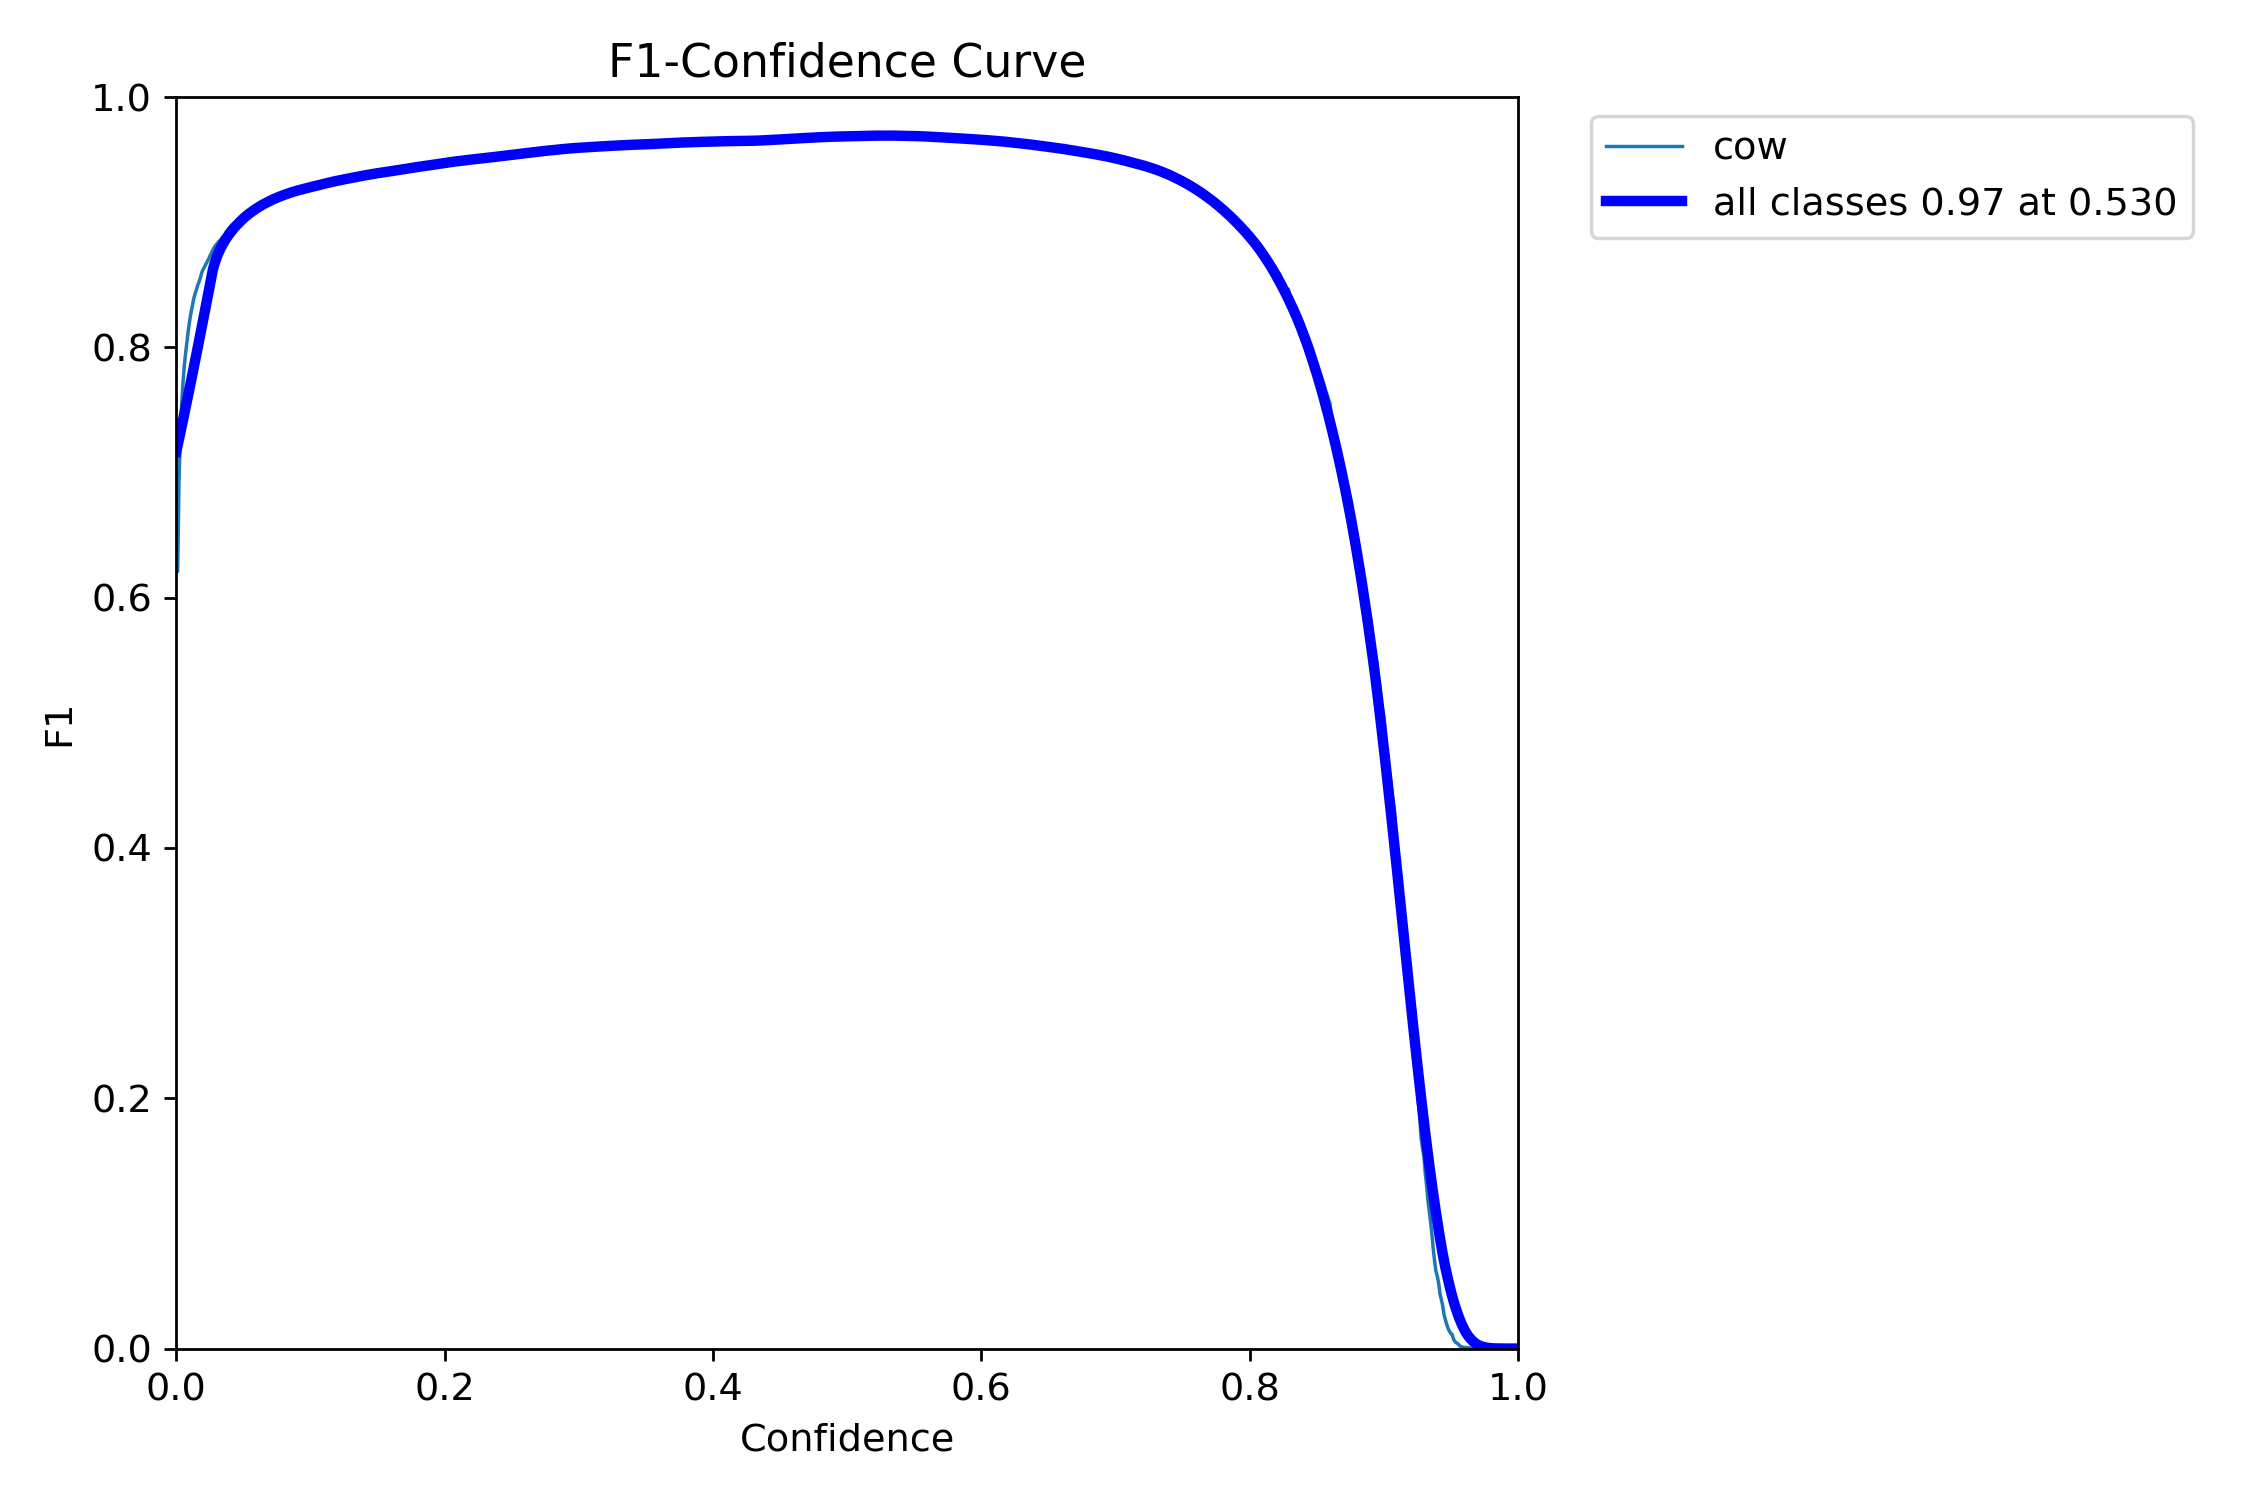

In [10]:
titulo = 'F1'

# Mostrar la imagen y el título
display(HTML(f'<h2>{titulo}</h2>'))
Image(filename= f'/content/runs/detect/train/F1_curve.png', width= 600 )

##Validacion

In [57]:
!yolo task=detect mode=val model=/content/best.pt data='/content/cowsV82/cows2v8/configuration.yaml'

Ultralytics YOLOv8.1.9 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/cowsV82/cows2v8/valid/labels.cache... 270 images, 32 backgrounds, 0 corrupt: 100% 302/302 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 19/19 [01:07<00:00,  3.58s/it]
                   all        302       3998      0.974      0.975      0.992      0.873
Speed: 1.3ms preprocess, 17.5ms inference, 0.0ms loss, 6.0ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


##Predicciones para imagenes

In [11]:

#se carga el modelo con los mejores pesos obtenidos y se define como model para usarlo porteriormente
model= YOLO('/content/best.pt')

###Ejemplo imagen uno

In [12]:
from PIL import Image



# Realiza inferencia con el modelo YOLOv8n en la imagen '050c461d-762a-4d53-8c1f-5985affefc71.jpg'
prueba1 = model('/content/cowsV82/cows2v8/test/images/1b30c671-4499-4a70-991a-79df2333b392.JPG')

num_b=0 # variable para numero de cajas lo cual representara el numero de vacas

for result in prueba1:
    boxes = result.boxes  # Boxes object for bbox outputs
    # Incrementa el contador de cajas con la cantidad de cajas en este resultado
    num_b += len(boxes)

for r in prueba1:
    im_array = r.plot()  # Genera un gráfico de un array de numpy en formato BGR con las predicciones
    im = Image.fromarray(im_array[..., ::-1])  # Convierte el array a una imagen PIL en formato RGB
    im.show()  # Muestra la imagen
    im.save('results.jpg')  # Guarda la imagen con el nombre 'results.jpg'






image 1/1 /content/cowsV82/cows2v8/test/images/1b30c671-4499-4a70-991a-79df2333b392.JPG: 480x640 3 cows, 71.1ms
Speed: 4.0ms preprocess, 71.1ms inference, 598.1ms postprocess per image at shape (1, 3, 480, 640)


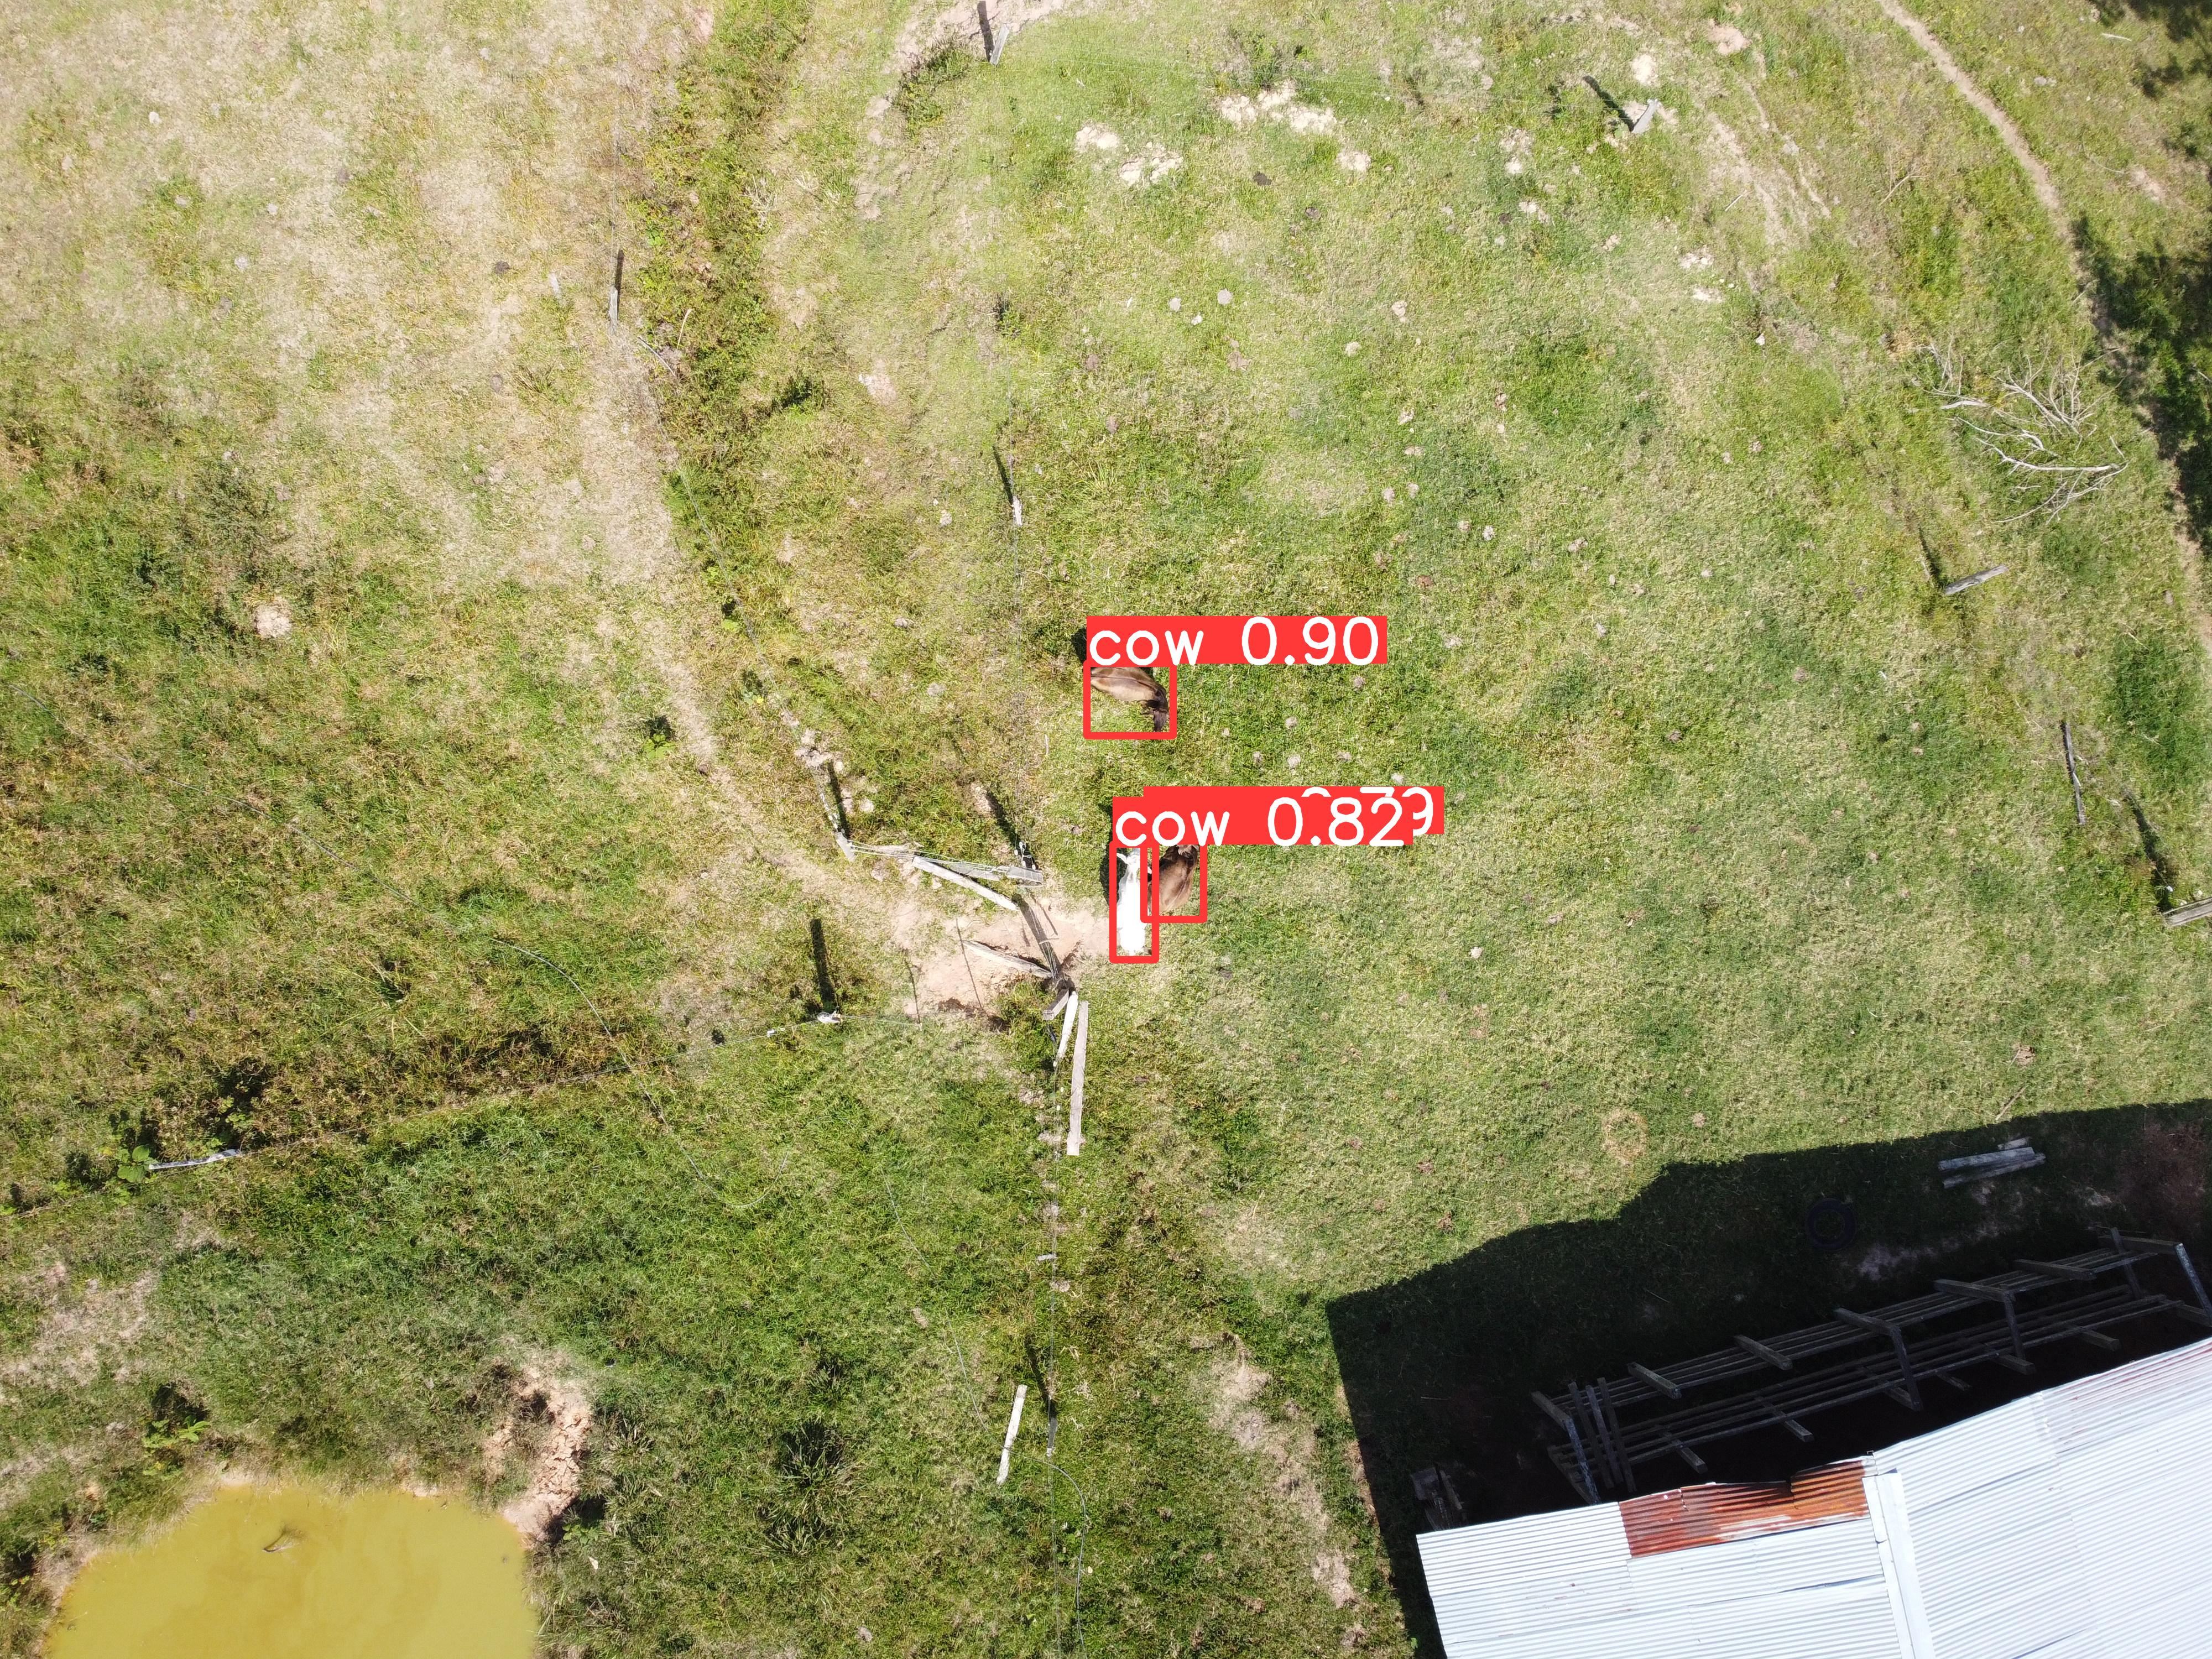

In [13]:
from IPython.display import Image, display, HTML

#imprimir resultados
titulo = 'prueba1'
im = f'{num_b} vacas'  # Formatea la cadena con el número de vacas

# Mostrar el título
display(HTML(f'<h2>{titulo}</h2>'))

# Mostrar el número de vacas
display(HTML(f'<h2>{im}</h2>'))

# Mostrar la imagen
Image(filename='/content/results.jpg', width=600)

###Ejemplo Imagen dos

In [21]:
#imagen dos
from PIL import Image



# Realiza inferencia con el modelo YOLOv8n en la imagen '050c461d-762a-4d53-8c1f-5985affefc71.jpg'
prueba2 = model('/content/cowsV82/cows2v8/test/images/a55cf9ef-0822-4a30-9088-0528f140e8b9.JPG')

num_b=0 # variable para numero de cajas lo cual representara el numero de vacas

for result in prueba2:
    boxes = result.boxes  # Boxes object for bbox outputs
    # Incrementa el contador de cajas con la cantidad de cajas en este resultado
    num_b += len(boxes)

for r in prueba2:
    im_array = r.plot()  # Genera un gráfico de un array de numpy en formato BGR con las predicciones
    im = Image.fromarray(im_array[..., ::-1])  # Convierte el array a una imagen PIL en formato RGB
    im.show()  # Muestra la imagen
    im.save('results.jpg')  # Guarda la imagen con el nombre 'results.jpg'



image 1/1 /content/cowsV82/cows2v8/test/images/a55cf9ef-0822-4a30-9088-0528f140e8b9.JPG: 384x640 39 cows, 25.4ms
Speed: 2.6ms preprocess, 25.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


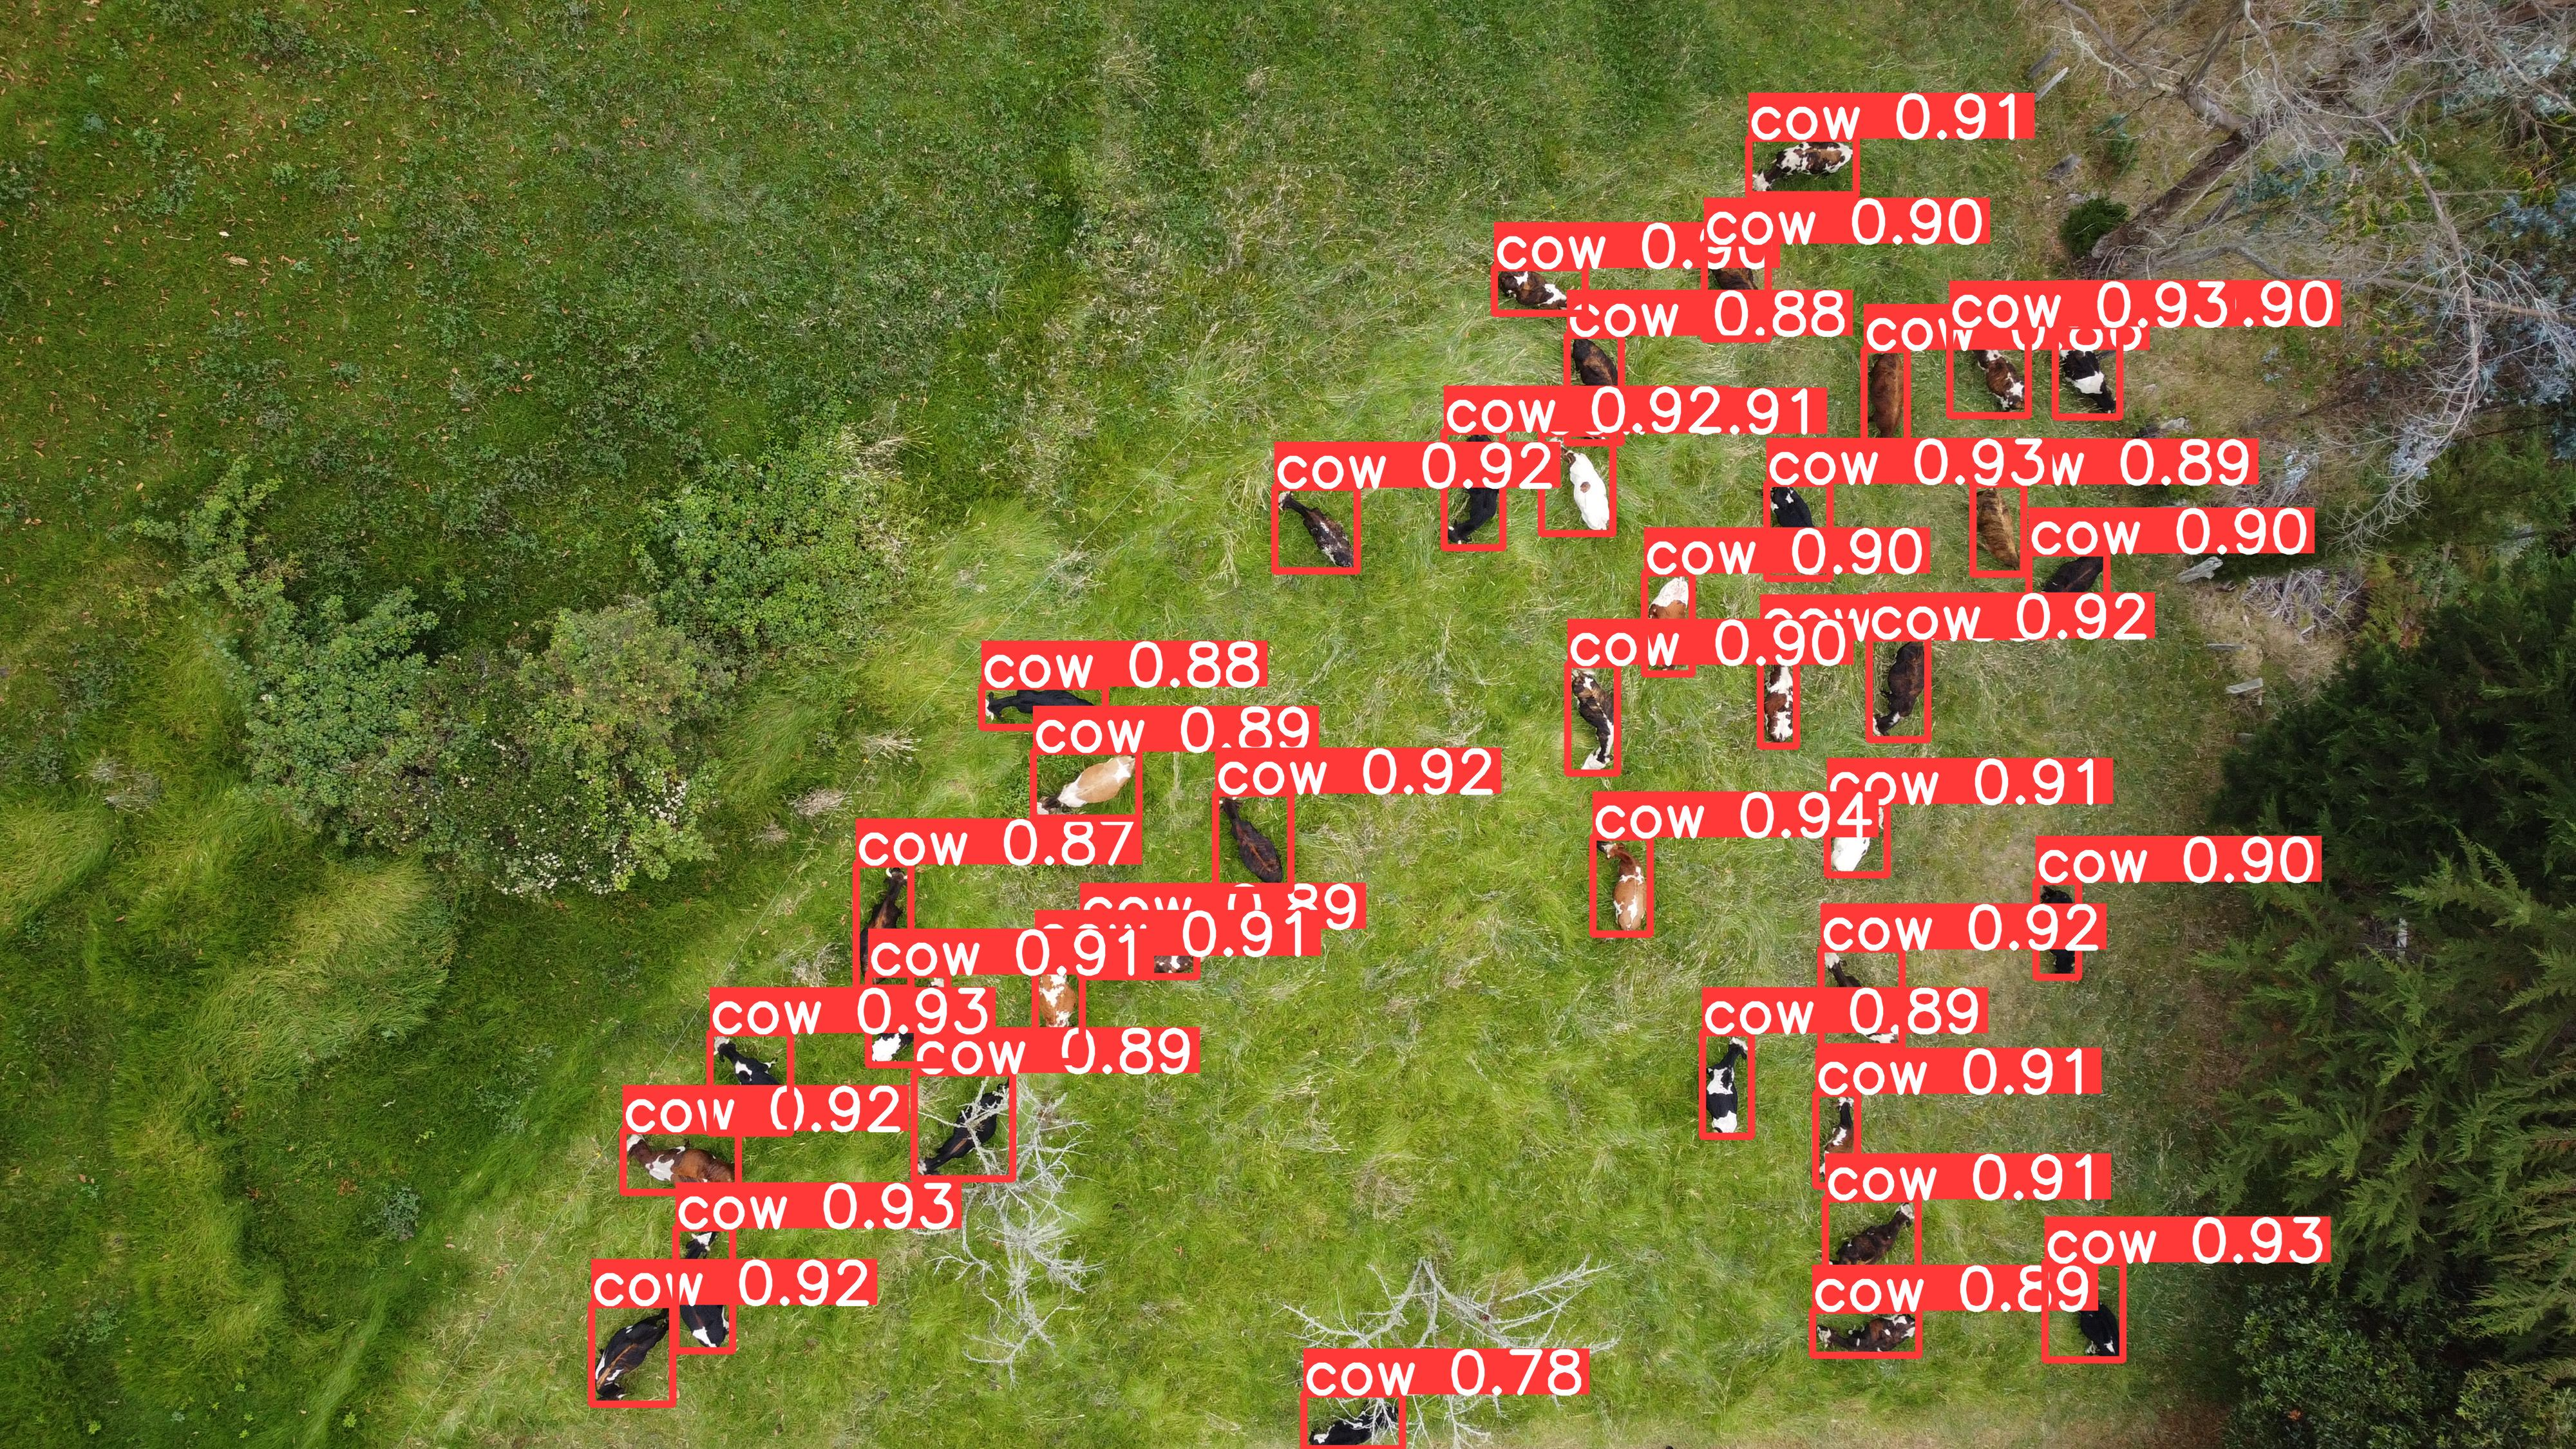

In [22]:
from IPython.display import Image, display, HTML

#imprimir resultados
titulo = 'prueba2'
im = f'{num_b} vacas'  # Formatea la cadena con el número de vacas

# Mostrar el título
display(HTML(f'<h2>{titulo}</h2>'))

# Mostrar el número de vacas
display(HTML(f'<h2>{im}</h2>'))

# Mostrar la imagen
Image(filename='/content/results.jpg', width=600)